## _Input Data, Detector Layout, Distributions_

In [1]:
import sys, os, glob, yaml

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pprint
import seaborn as sns
import trackml.dataset

In [4]:
import torch
from torch_geometric.data import Data
import itertools

In [6]:
# append parent dir
sys.path.append('..')

# local imports
from src import draw_event
from src import compose_event

## _Input Data_

In [9]:
# mu- data (old)
# input_dir = './data_sets/pandaml/data_3.0_7.0_GeV/'

# mu+mu- data (current)
input_dir = '../train_all'

# pbarp data (coming)
# input_dir = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

In [12]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)
all_files[:10]

['event0000000958-truth.csv',
 'event0000000629-hits.csv',
 'event0000000374-particles.csv',
 'event0000000588-hits.csv',
 'event0000000483-cells.csv',
 'event0000000928-cells.csv',
 'event0000000698-truth.csv',
 'event0000000295-truth.csv',
 'event0000000640-particles.csv',
 'event0000000257-hits.csv']

In [19]:
# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, '')) for f in all_files if f.endswith(suffix))
file_prefixes[:10]

['../train_all/event0000000000',
 '../train_all/event0000000001',
 '../train_all/event0000000002',
 '../train_all/event0000000003',
 '../train_all/event0000000004',
 '../train_all/event0000000005',
 '../train_all/event0000000006',
 '../train_all/event0000000007',
 '../train_all/event0000000008',
 '../train_all/event0000000009']

In [20]:
# number of events
len(file_prefixes)

1000

In [21]:
# OR, Extract File Prefixes (only works if we don't have any additional files e.g. *.root, *.log etc.)
all_events = sorted(np.unique([os.path.join(input_dir, event[:15]) for event in all_files]))
all_events[:10]

['../train_all/event0000000000',
 '../train_all/event0000000001',
 '../train_all/event0000000002',
 '../train_all/event0000000003',
 '../train_all/event0000000004',
 '../train_all/event0000000005',
 '../train_all/event0000000006',
 '../train_all/event0000000007',
 '../train_all/event0000000008',
 '../train_all/event0000000009']

In [23]:
# number of events (in addition to *.csv, *.root and *.log files exists in this dir.)
len(all_events)

1009

In [13]:
event_id = 1

In [27]:
# Fetch an event, use event_id (int)
prefix = "event{:010d}".format(event_id)                     # OR, 
prefix = str('event{!s}'.format(format(event_id, '010d')))   # a little better
event_prefix = os.path.join(input_dir, prefix)              # event_prefix ~ event_file = input_dir + prefix

In [28]:
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

In [29]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-12.2456,12.120,35.0,9,0,12
1,2,-13.1203,12.625,35.0,9,1,117
2,3,-13.9950,13.130,35.0,9,2,228
3,4,-13.9950,14.140,35.0,9,3,344
4,5,-14.8697,14.645,35.0,9,4,467


In [24]:
# OR, use event_id to fectch one file from list of all files
event_prefix = file_prefixes[event_id]
print(event_prefix)

../train_all/event0000000001


In [10]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

# memory usage
mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(os.path.basename(event_prefix), mem_bytes / 2**20))

event0000000001 memory usage 0.03 MB


In [11]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-12.2456,12.120,35.0,9,0,12
1,2,-13.1203,12.625,35.0,9,1,117
2,3,-13.9950,13.130,35.0,9,2,228
3,4,-13.9950,14.140,35.0,9,3,344
4,5,-14.8697,14.645,35.0,9,4,467


In [12]:
tubes.head()

,hit_id,isochrone,depcharge,energyloss,volume_id,layer_id,module_id,skewed,sector_id
0,1,0.262386,6000300.0,6.00030,9,0,12,0,0
1,2,0.052152,13722100.0,13.72210,9,1,117,0,0
2,3,0.374347,4073350.0,4.07335,9,2,228,0,0
3,4,0.265922,6590940.0,6.59094,9,3,344,0,0
4,5,0.085074,11615800.0,11.61580,9,4,467,0,0


In [13]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,-0.134669,0.028540,-0.091022,1,25,13,0
1,2,0.0,0.0,0.0,-0.550762,-0.441498,0.780609,1,24,13,0
2,3,0.0,0.0,0.0,-0.072724,0.023378,0.175138,1,30,13,0
3,4,0.0,0.0,0.0,0.936311,-0.311491,-1.019850,1,24,13,0
4,5,0.0,0.0,0.0,-1.049040,-0.440627,0.471787,1,23,13,0


In [14]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-12.4533,11.9370,18.0376,-0.208362,0.236490,0.330727,1.0,10
1,2,-13.0823,12.6579,19.0411,-0.206470,0.238251,0.330621,1.0,10
2,3,-13.7024,13.3791,20.0387,-0.204324,0.239940,0.330703,1.0,10
3,4,-14.1996,13.9682,20.8477,-0.202521,0.241390,0.330725,1.0,10
4,5,-14.8052,14.6980,21.8424,-0.200172,0.243415,0.330639,1.0,10


### _(1) - Detector Layout_

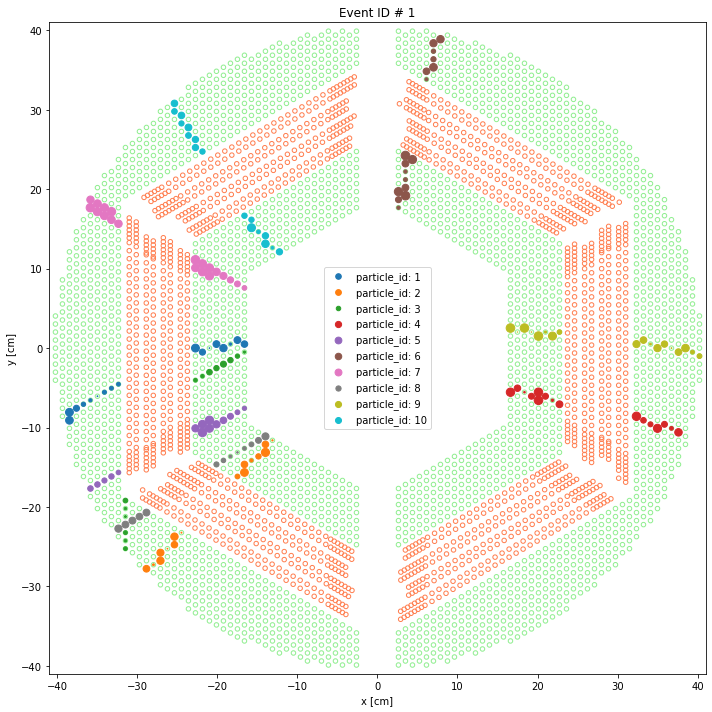

In [15]:
event = compose_event(event_prefix,skewed=False)
draw_event(event,figsize=(10, 10));

### _(2) - Draw Individual Tracks_

In [16]:
# preprocess hits
# hits['r'] = hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1)
hits_ = hits.assign(r=hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1))
hits_.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r
0,1,-12.2456,12.120,35.0,9,0,12,17.229310
1,2,-13.1203,12.625,35.0,9,1,117,18.208045
2,3,-13.9950,13.130,35.0,9,2,228,19.190021
3,4,-13.9950,14.140,35.0,9,3,344,19.894714
4,5,-14.8697,14.645,35.0,9,4,467,20.870650


In [17]:
# we already have sorted hits, lets draw a single track.
data = hits_[truth.particle_id == particles.iloc[1,0]]
data.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r
203,204,-13.1203,-11.615,35.0,9,0,40,17.522856
204,205,-13.9950,-12.120,35.0,9,1,146,18.513628
205,206,-13.9950,-13.130,35.0,9,2,259,19.190021
206,207,-14.8697,-13.635,35.0,9,3,377,20.174767
207,208,-15.7443,-14.140,35.0,9,4,501,21.161819


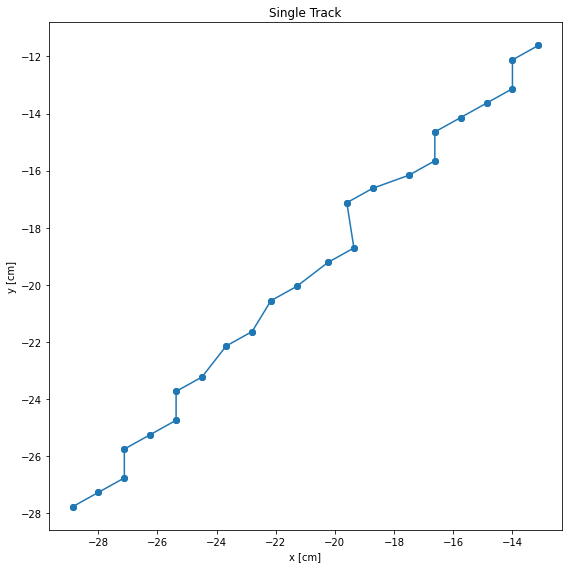

In [18]:
# Using Object Oriented API
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(data.x.values, data.y.values)
ax.plot(data.x.values, data.y.values, "-o")

ax.set_title('Single Track')
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
# ax.set_xlim(-40, 40)
# ax.set_ylim(-40, 40)
fig.tight_layout()
# fig.savefig('event.png')

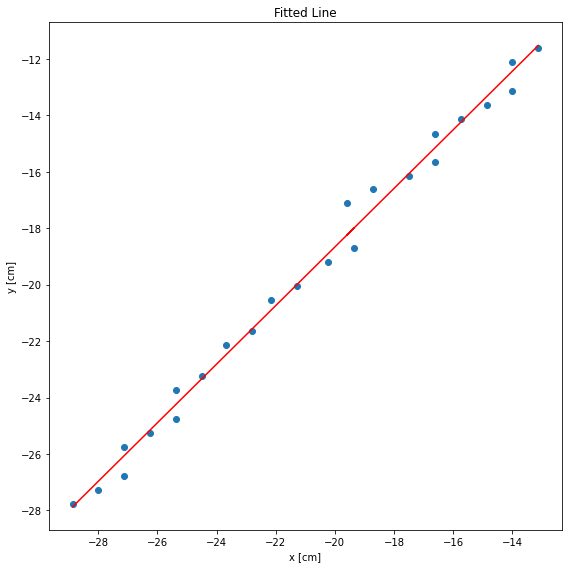

In [19]:
# Using Object Oriented API
plt.close('all')
fig, ax = plt.subplots(figsize=(8,8))

a, b = np.polyfit(data.x, data.y, 1)
y = a*data.x.values + b

ax.scatter(data.x.values, data.y.values)
ax.plot(data.x.values, y, 'r')
ax.set_title('Fitted Line')
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
# ax.set_xlim(-40, 40)
# ax.set_ylim(-40, 40)
fig.tight_layout()
# fig.savefig('event.png')

### _(3) - Momentum Distributions_

In [20]:
# calculate & assign pt
particles = particles.assign(pt=np.sqrt(particles.px**2 + particles.py**2))

In [21]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,pt
0,1,0.0,0.0,0.0,-0.134669,0.028540,-0.091022,1,25,13,0,0.137660
1,2,0.0,0.0,0.0,-0.550762,-0.441498,0.780609,1,24,13,0,0.705875
2,3,0.0,0.0,0.0,-0.072724,0.023378,0.175138,1,30,13,0,0.076389
3,4,0.0,0.0,0.0,0.936311,-0.311491,-1.019850,1,24,13,0,0.986765
4,5,0.0,0.0,0.0,-1.049040,-0.440627,0.471787,1,23,13,0,1.137821


In [22]:
particles.pt

0    0.137660
1    0.705875
2    0.076389
3    0.986765
4    1.137821
5    0.815628
6    0.626996
7    0.684768
8    0.265204
9    0.318243
Name: pt, dtype: float32

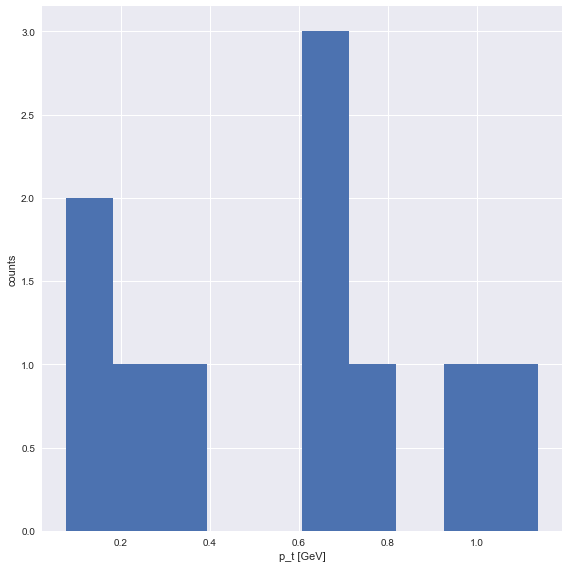

In [23]:
# Using Pyplot API
plt.close('all')
plt.style.use('seaborn')
fig = plt.figure(figsize=(8,8))

plt.hist(particles.pt, bins=10)

plt.xlabel('p_t [GeV]')
plt.ylabel('counts')
# plt.xlim((0.1, 1.5))
# plt.ylim((5, 40))
plt.tight_layout()

In [24]:
# find average hits per track
print("Average number of hits per tracks: {}".format(hits.hit_id.count()/particles.particle_id.unique().size))

Average number of hits per tracks: 25.2


## _Misc._